In [1]:
import sys

import numpy as np

sys.path.append("..")  # Add the parent directory to the system path

from covidboosters import PeriodicHeterogeneousRenewalModel
from scripts.default_parameters import get_default_parameters

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.ioff()
rc_params = {
    "axes.spines.top": False,
    "axes.spines.right": False,
    "figure.autolayout": True,
    "axes.autolimit_mode": "round_numbers",
    "savefig.transparent": True,
    "savefig.format": "pdf",
    "svg.fonttype": "none",
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 14,
}
sns.set_theme(style="ticks", rc=rc_params)

In [3]:
rng = np.random.default_rng(2)

In [4]:
default_parameters = get_default_parameters()
period = default_parameters["period"]
reproduction_no_mean = 2
reproduction_no_prop_variation = 0.5

peak_transmission_time = default_parameters["peak_transmission_time"]
generation_time_dist = default_parameters["generation_time_dist"]

no_simulations = 5000
sim_incidence_cutoff = 10

month_starts = np.arange(0, period + 1, period / 12)
month_list = ["Jan", "", "", "Apr", "", "", "Jul", "", "", "Oct", "", "", "Jan"]

In [5]:
time_vec = np.arange(period)
reproduction_no_vec = reproduction_no_mean * (
    1
    + reproduction_no_prop_variation
    * np.cos(2 * np.pi * (time_vec - peak_transmission_time) / period)
)

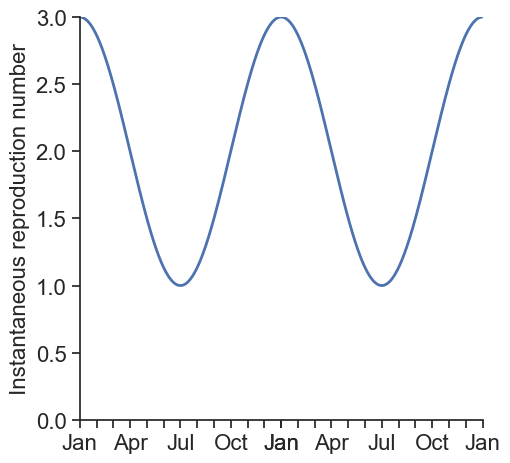

In [6]:
fig = plt.figure()
ax = fig.add_subplot(box_aspect=1)
ax.plot(
    np.append(time_vec, time_vec + period),
    np.append(reproduction_no_vec, reproduction_no_vec),
)
ax.set_xlim(0, 2 * period)
ax.set_xticks(
    np.append(month_starts, month_starts + period),
    labels=month_list + month_list,
)
ax.set_ylim(0, 3)
# ax.set_xlabel("Time of introduction")
ax.set_ylabel("Instantaneous reproduction number")
plt.savefig("figures_initial/without_vaccination/reproduction_number.pdf")
plt.show()

In [7]:
dispersion_param = 0.5
time_cor_vec = np.arange(2 * period)
time_sor_vec = np.arange(2 * period, step=30)
model = PeriodicHeterogeneousRenewalModel(
    time_vec=time_vec,
    reproduction_no_vec=reproduction_no_vec,
    generation_time_dist=generation_time_dist,
    dispersion_param=dispersion_param,
)
cor_vec = model.case_outbreak_risk(time_cor_vec)
ior_vec = model.instantaneous_outbreak_risk(time_cor_vec)
sor_vec = model.simulated_outbreak_risk(
    time_sor_vec,
    incidence_cutoff=sim_incidence_cutoff,
    no_simulations=no_simulations,
    rng=rng,
)

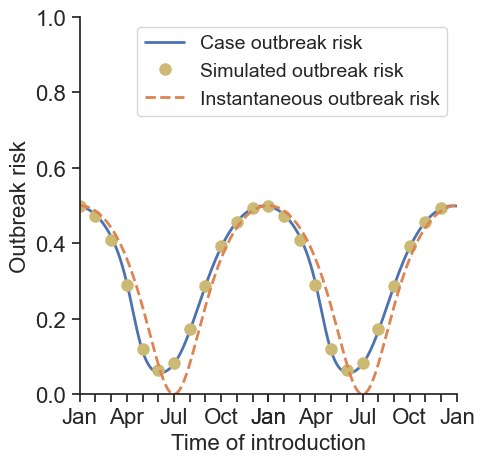

In [8]:
fig = plt.figure()
ax = fig.add_subplot(box_aspect=1)
ax.plot(time_cor_vec, cor_vec)
ax.plot(time_sor_vec, sor_vec, "yo")
ax.plot(time_cor_vec, ior_vec, "--")
ax.set_xlim(0, 2 * period)
ax.set_xticks(
    np.append(month_starts, month_starts + period),
    labels=month_list + month_list,
)
ax.set_ylim(0, 1)
ax.set_xlabel("Time of introduction")
ax.set_ylabel("Outbreak risk")
ax.legend(
    [
        "Case outbreak risk",
        "Simulated outbreak risk",
        "Instantaneous outbreak risk",
    ]
)
plt.savefig("figures_initial/without_vaccination/outbreak_risk_methods.pdf")
plt.show()

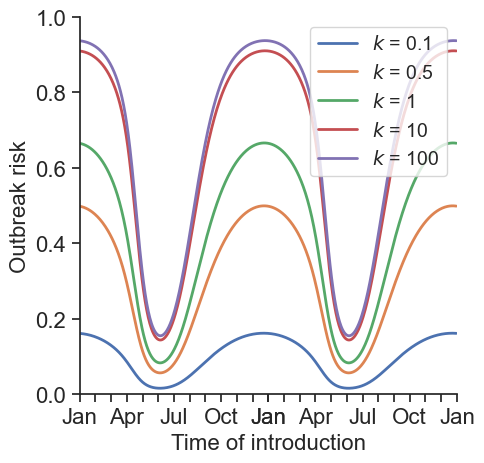

In [9]:
fig = plt.figure()
ax = fig.add_subplot(box_aspect=1)
for dispersion_param in [0.1, 0.5, 1, 10, 100]:
    model = PeriodicHeterogeneousRenewalModel(
        time_vec=time_vec,
        reproduction_no_vec=reproduction_no_vec,
        generation_time_dist=generation_time_dist,
        dispersion_param=dispersion_param,
    )
    cor_vec = model.case_outbreak_risk(time_cor_vec)
    ax.plot(time_cor_vec, cor_vec, label="$\\it{k}$" + f" = {dispersion_param}")
ax.set_xlim(0, 2 * period)
ax.set_xticks(
    np.append(month_starts, month_starts + period),
    labels=month_list + month_list,
)
ax.set_ylim(0, 1)
ax.set_xlabel("Time of introduction")
ax.set_ylabel("Outbreak risk")
ax.legend(loc="upper right")
plt.savefig("figures_initial/without_vaccination/outbreak_risk_vs_k.pdf")
plt.show()